# Discretization with K-means

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

# Finding the optimal number of clusters

In [4]:
# The variables to transform:

variables = ["MedInc", "HouseAge", "AveRooms"]

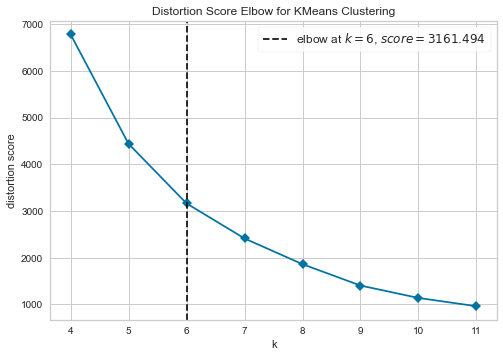

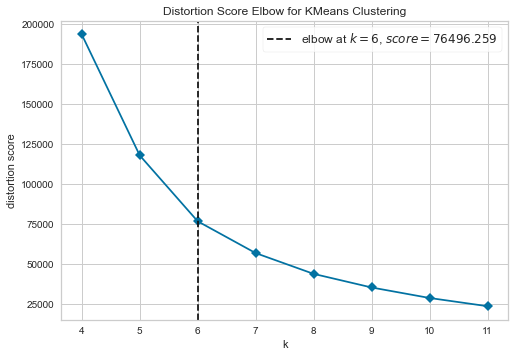

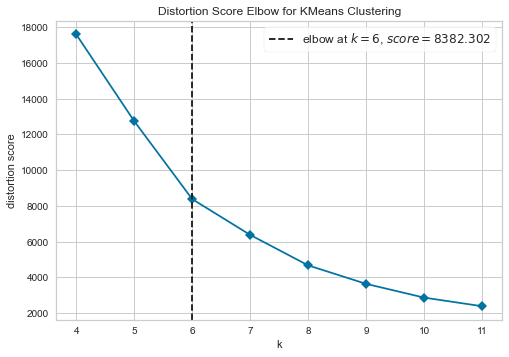

In [5]:
# set up a k-means clustering algorithm
k_means = KMeans(random_state=10)

# we test every variable
for variable in variables:

    # set up a visualiser
    visualizer = KElbowVisualizer(
        k_means, k=(4, 12), metric="distortion", timings=False
    )

    # Fit the data to the visualizer
    visualizer.fit(X_train[variable].to_frame())

    # Finalize and render the figure
    visualizer.show()

## K-means discretization with Scikit-Learn

In [6]:
# number of clusters

k = 6

# set up a k-means discretizer

disc = KBinsDiscretizer(n_bins=k, encode="onehot-dense", strategy="kmeans")

# fit the discretizer to the train set so that it learns
# the clusters

disc.fit(X_train[variables])

KBinsDiscretizer(encode='onehot-dense', n_bins=6, strategy='kmeans')

In [7]:
# we can inspect the bin boundaries here:

disc.bin_edges_

array([array([ 0.4999    ,  2.49587954,  3.66599029,  4.95730115,  6.67700141,
        9.67326677, 15.0001    ]),
       array([ 1.        , 11.7038878 , 19.88430419, 27.81472503, 35.39424098,
       43.90930314, 52.        ]),
       array([  0.84615385,   4.84568771,   6.62222005,  15.24138445,
        37.60664483,  92.4473438 , 132.53333333])], dtype=object)

In [8]:
# obtain new features: for train set

train_features = disc.transform(X_train[variables])

train_features

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [9]:
# obtain new features: for test set

test_features = disc.transform(X_test[variables])

test_features

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [10]:
# We have 18 one-hot encoded new features

test_features.shape

(6192, 18)

In [11]:
# create new feature names

var_names = [f"{var}_cluster_{i}" for var in variables for i in range(k)]

var_names

['MedInc_cluster_0',
 'MedInc_cluster_1',
 'MedInc_cluster_2',
 'MedInc_cluster_3',
 'MedInc_cluster_4',
 'MedInc_cluster_5',
 'HouseAge_cluster_0',
 'HouseAge_cluster_1',
 'HouseAge_cluster_2',
 'HouseAge_cluster_3',
 'HouseAge_cluster_4',
 'HouseAge_cluster_5',
 'AveRooms_cluster_0',
 'AveRooms_cluster_1',
 'AveRooms_cluster_2',
 'AveRooms_cluster_3',
 'AveRooms_cluster_4',
 'AveRooms_cluster_5']

In [12]:
# concatenate the features to the original data

X_train = pd.concat(
    [X_train, pd.DataFrame(train_features, columns=var_names, index=X_train.index)],
    axis=1,
)

X_test = pd.concat(
    [X_test, pd.DataFrame(test_features, columns=var_names, index=X_test.index)], axis=1
)


X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_cluster_0,MedInc_cluster_1,...,HouseAge_cluster_2,HouseAge_cluster_3,HouseAge_cluster_4,HouseAge_cluster_5,AveRooms_cluster_0,AveRooms_cluster_1,AveRooms_cluster_2,AveRooms_cluster_3,AveRooms_cluster_4,AveRooms_cluster_5
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# drop original features

X_train.drop(labels=variables, axis=1, inplace=True)
X_test.drop(labels=variables, axis=1, inplace=True)

X_train.head()

,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_cluster_0,MedInc_cluster_1,MedInc_cluster_2,MedInc_cluster_3,MedInc_cluster_4,...,HouseAge_cluster_2,HouseAge_cluster_3,HouseAge_cluster_4,HouseAge_cluster_5,AveRooms_cluster_0,AveRooms_cluster_1,AveRooms_cluster_2,AveRooms_cluster_3,AveRooms_cluster_4,AveRooms_cluster_5
1989,0.700000,193.0,4.825000,36.73,-119.79,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
256,1.184116,836.0,3.018051,37.77,-122.21,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7887,1.087912,1387.0,3.810440,33.87,-118.04,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4581,1.196000,3051.0,3.051000,34.06,-118.28,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1993,1.161677,606.0,3.628743,36.73,-119.81,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_test.head()

,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_cluster_0,MedInc_cluster_1,MedInc_cluster_2,MedInc_cluster_3,MedInc_cluster_4,...,HouseAge_cluster_2,HouseAge_cluster_3,HouseAge_cluster_4,HouseAge_cluster_5,AveRooms_cluster_0,AveRooms_cluster_1,AveRooms_cluster_2,AveRooms_cluster_3,AveRooms_cluster_4,AveRooms_cluster_5
14740,1.075472,1551.0,4.180593,32.58,-117.05,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10101,0.927739,1296.0,3.020979,33.92,-117.97,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20566,1.026217,1554.0,2.910112,38.65,-121.84,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2670,1.316901,390.0,2.746479,33.20,-115.60,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15709,1.039578,649.0,1.712401,37.79,-122.43,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
